In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
import operator
from collections import Counter
from imblearn.over_sampling import SMOTE

# standard libraries
import numpy as np
import pandas as pd
import matplotlib as plt
from statistics import mean
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate, train_test_split
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif

# classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier


# nn
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,  BatchNormalization, Flatten, Dropout, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import SGD
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau


# visualize
import matplotlib.pyplot as plt
from matplotlib import pyplot

# never forget to supress warnings
import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv('movies_final.csv', index_col=0)

In [19]:
col = 'averageRating'

conditions = [
    df[col].between(0,2),
    df[col].between(2,4),
    df[col].between(4,6),
    df[col].between(6,8),
    df[col].between(8,10)
]

ranks = ['rank1', 'rank2', 'rank3','rank4', 'rank5']
df['ratingClass'] = np.select(conditions, ranks, default=np.nan)
df['ratingClass'] = df['ratingClass'].astype('category').cat.codes

In [21]:
X = df.drop(columns=['averageRating', 'ratingClass', 'tconst', 'primaryTitle'])
y = df[['ratingClass']]
y = tf.keras.utils.to_categorical(y)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection

In [26]:
# pipeline = Pipeline([
#                      ('scaler',StandardScaler()),
#                      ('model',Lasso())
# ])

In [28]:
# search = GridSearchCV(pipeline,
#                       {'model__alpha':np.arange(0.1,10,0.1)},
#                       cv = 5, scoring="neg_mean_squared_error",verbose=3
#                       )

In [ ]:
# search.fit(X_train,y_train)

In [ ]:
# search.best_params_

In [ ]:
# coefficients = search.best_estimator_.named_steps['model'].coef_

In [ ]:
# importance = np.abs(coefficients)

In [ ]:
# features = X.columns

In [ ]:
# np.array(features)[importance > 0]

In [ ]:
# np.array(features)[importance == 0]

In [ ]:
# np.array(features)[importance != 0]

Chi-sq test for feature selection: The results of this test can be used for feature selection, where those features that are independent of the target variable can be removed from the dataset.

In [ ]:
# fs = SelectKBest(score_func=chi2, k='all')
# fs.fit(X_train, y_train)
# X_train_fs = fs.transform(X_train)
# X_test_fs = fs.transform(X_test)

In [ ]:
# for i in range(len(fs.scores_)):
#     print('feature %d: %f' % (i, fs.scores_[i]))
    
# pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
# pyplot.show()

# Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

In [ ]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [ ]:
X = df.drop(columns=['averageRating', 'ratingClass', 'tconst', 'primaryTitle'])
y = df[['ratingClass']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

In [ ]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
scores = {}
features = X.columns

for i in range(len(fs.scores_)):
    scores[features[i]] = fs.scores_[i]
#     if i not in scores:
#         scores.append('Feature %d: %f' % (i, fs.scores_[i]))

In [ ]:
sorted_scores = sorted(scores.items(), key=operator.itemgetter(1), reverse=True)

In [ ]:
sorted_scores

In [ ]:
sorted_scores[1]

In [ ]:
filtered_features = [feature for feature in sorted_scores if feature[1] > 0]

In [ ]:
filtered_features

In [ ]:
selected_features = []

for i in filtered_features:
    selected_features.append(i[0])

In [ ]:
selected_features

In [ ]:
X = X[selected_features]

In [ ]:
len(X.columns)

In [ ]:
y.value_counts()

In [ ]:
y_vars = ['ratingClass', 'averageRating']

selected_features.extend(y_vars)

In [ ]:
selected_features

In [ ]:
df2 = df[selected_features]

In [ ]:
X = df2.drop(columns=['averageRating', 'ratingClass'])
y = df2[['ratingClass']]

In [ ]:
# y = tf.keras.utils.to_categorical(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversampling
With SMOTE, the minority class is over-sampled by creating “synthetic” examples
These introduced synthetic examples are based along the line segments joining a defined number of k minority class nearest neighbours, which is in the imblearn package is set at five by default.

In [ ]:
print("Before oversampling: ", y_train.value_counts())

In [ ]:
X_train

In [ ]:
SMOTE = SMOTE()

In [ ]:
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

In [ ]:
print("After oversampling: ", y_train_SMOTE.value_counts())

In [ ]:
# classifier = MLPClassifier(hidden_layer_sizes=(150,100,50)
#                            , max_iter=300
#                            ,activation = 'relu'
#                            ,solver='adam',random_state=42)

# classifier.fit(X_train, y_train)

In [ ]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements

In [49]:
# y_pred = classifier.predict(X_test)

In [50]:
# cm = confusion_matrix(y_pred, y_test)

In [52]:
# print("Accuracy of MLPClassifier : ", accuracy(cm))

Accuracy of MLPClassifier :  0.5428467683369644


In [45]:
# mlp = MLPClassifier(solver="adam", activation="logistic", alpha=1e-5, hidden_layer_sizes=(100, 20),
#                     random_state=42)

# print("Score: {:.4f}".format(cross_val_score(mlp, X_train, y_train, cv=3).mean()))

Score: 0.5721


In [54]:
# mlp.fit(X_train, y_train)
# y_pred = mlp.predict(X_test)

In [55]:
# cm = confusion_matrix(y_pred, y_test)

In [56]:
# print("Accuracy of MLPClassifier : ", accuracy(cm))

Accuracy of MLPClassifier :  0.5750907770515614


In [ ]:
# model=SVC()
# clf_SMOTE = model.fit(X_train_SMOTE, y_train_SMOTE)
# pred_SMOTE = clf_SMOTE.predict(X_test)

In [ ]:
y_train_cat = tf.keras.utils.to_categorical(y_train)
y_test_cat = tf.keras.utils.to_categorical(y_test)

In [142]:
def final_model(input_dim=(len(X_train.columns)), classes = 5):
    
    model = Sequential([
        

    Dense(350, input_dim=(len(X_train.columns)), activation = 'relu', kernel_initializer='normal', kernel_regularizer=l2(0.0005), name = 'layer_1'),
    

    Dense(100, input_dim=(len(X_train.columns)), kernel_initializer='normal', name = 'layer_2'),
    

    BatchNormalization(name = 'batchnorm_1'),
    Activation("relu"),
    Dropout(0.25, name = 'dropout_1'),
    Dense(64, input_dim=(len(X_train.columns)), kernel_initializer='normal', activation = 'relu', kernel_regularizer=l2(0.0005), name = 'layer_3'),
        

    Dense(64, input_dim=(len(X_train.columns)), kernel_initializer='normal', name = 'layer_4', use_bias=False),
        

    BatchNormalization(name = 'batchnorm_2'),
    Activation("relu"),
    Dropout(0.25, name = 'dropout_2'),
    Flatten(name = 'flatten'),

        

    Dense(256, input_dim=(len(X_train.columns)), kernel_initializer='normal', name = 'fully_connected_1', use_bias=False),
        

    BatchNormalization(name = 'batchnorm_3'),
    Activation("relu"),
        

    Dense(128, input_dim=(len(X_train.columns)), kernel_initializer='normal', name = 'fully_connected_2', use_bias=False),
        

    BatchNormalization(name = 'batchnorm_4'),
    Activation("relu"),
        

    Dense(84, input_dim=(len(X_train.columns)), name = 'fully_connected_3', use_bias=False),
        

    BatchNormalization(name = 'batchnorm_5'),
    Activation("relu"),
    Dropout(0.25, name = 'dropout_3'),


    Dense(units = 5, activation = 'softmax', name = 'output')  
    ])
    
    model._name = 'final_model'

    return model

In [143]:
rating_predictor = final_model(input_dim=(len(X_train.columns)), classes = 5)

In [144]:
rating_predictor.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [145]:
variable_learning_rate = ReduceLROnPlateau(monitor='val_loss', factor = 0.2, patience = 2)
mc = ModelCheckpoint("/home/creeg/projects/audible/notebooks/rating_predictor.h5", monitor='val_accuracy', verbose=1, save_best_only=True)
cb = [mc, variable_learning_rate]

In [146]:
his = rating_predictor.fit(X_train, y_train, epochs=50, batch_size=20, validation_split=0.3, callbacks=cb)
rating_predictor.save('rating_predictor.h5')

Epoch 1/200
3849/3856 [============================>.] - ETA: 0s - loss: 1.0798 - accuracy: 0.5303
Epoch 1: val_accuracy improved from -inf to 0.55407, saving model to /home/creeg/projects/audible/notebooks/rating_predictor.h5
3856/3856 [==============================] - 15s 4ms/step - loss: 1.0797 - accuracy: 0.5304 - val_loss: 1.0201 - val_accuracy: 0.5541 - lr: 0.0010
Epoch 2/200
3850/3856 [============================>.] - ETA: 0s - loss: 1.0340 - accuracy: 0.5463
Epoch 2: val_accuracy did not improve from 0.55407
3856/3856 [==============================] - 14s 4ms/step - loss: 1.0339 - accuracy: 0.5463 - val_loss: 1.0118 - val_accuracy: 0.5496 - lr: 0.0010
Epoch 3/200
3842/3856 [============================>.] - ETA: 0s - loss: 1.0236 - accuracy: 0.5502
Epoch 3: val_accuracy improved from 0.55407 to 0.55592, saving model to /home/creeg/projects/audible/notebooks/rating_predictor.h5
3856/3856 [==============================] - 14s 4ms/step - loss: 1.0232 - accuracy: 0.5503 - val_l

Epoch 26/200
3850/3856 [============================>.] - ETA: 0s - loss: 0.9893 - accuracy: 0.5618
Epoch 26: val_accuracy improved from 0.56754 to 0.56832, saving model to /home/creeg/projects/audible/notebooks/rating_predictor.h5
3856/3856 [==============================] - 15s 4ms/step - loss: 0.9893 - accuracy: 0.5618 - val_loss: 0.9727 - val_accuracy: 0.5683 - lr: 0.0010
Epoch 27/200
3852/3856 [============================>.] - ETA: 0s - loss: 0.9894 - accuracy: 0.5623
Epoch 27: val_accuracy did not improve from 0.56832
3856/3856 [==============================] - 13s 3ms/step - loss: 0.9895 - accuracy: 0.5622 - val_loss: 0.9799 - val_accuracy: 0.5672 - lr: 0.0010
Epoch 28/200
3854/3856 [============================>.] - ETA: 0s - loss: 0.9881 - accuracy: 0.5605
Epoch 28: val_accuracy did not improve from 0.56832
3856/3856 [==============================] - 14s 4ms/step - loss: 0.9881 - accuracy: 0.5606 - val_loss: 0.9737 - val_accuracy: 0.5666 - lr: 0.0010
Epoch 29/200
3855/3856 

Epoch 53/200
3846/3856 [============================>.] - ETA: 0s - loss: 0.9743 - accuracy: 0.5687
Epoch 53: val_accuracy did not improve from 0.56990
3856/3856 [==============================] - 15s 4ms/step - loss: 0.9742 - accuracy: 0.5687 - val_loss: 0.9650 - val_accuracy: 0.5686 - lr: 2.0000e-04
Epoch 54/200
3850/3856 [============================>.] - ETA: 0s - loss: 0.9721 - accuracy: 0.5683
Epoch 54: val_accuracy improved from 0.56990 to 0.57047, saving model to /home/creeg/projects/audible/notebooks/rating_predictor.h5
3856/3856 [==============================] - 15s 4ms/step - loss: 0.9722 - accuracy: 0.5683 - val_loss: 0.9629 - val_accuracy: 0.5705 - lr: 2.0000e-04
Epoch 55/200
3842/3856 [============================>.] - ETA: 0s - loss: 0.9723 - accuracy: 0.5680
Epoch 55: val_accuracy improved from 0.57047 to 0.57072, saving model to /home/creeg/projects/audible/notebooks/rating_predictor.h5
3856/3856 [==============================] - 14s 4ms/step - loss: 0.9723 - accurac

Epoch 78/200
3840/3856 [============================>.] - ETA: 0s - loss: 0.9655 - accuracy: 0.5710
Epoch 78: val_accuracy did not improve from 0.57244
3856/3856 [==============================] - 14s 4ms/step - loss: 0.9654 - accuracy: 0.5710 - val_loss: 0.9598 - val_accuracy: 0.5723 - lr: 2.0000e-04
Epoch 79/200
3842/3856 [============================>.] - ETA: 0s - loss: 0.9661 - accuracy: 0.5696
Epoch 79: val_accuracy did not improve from 0.57244
3856/3856 [==============================] - 13s 3ms/step - loss: 0.9660 - accuracy: 0.5697 - val_loss: 0.9605 - val_accuracy: 0.5723 - lr: 2.0000e-04
Epoch 80/200
3851/3856 [============================>.] - ETA: 0s - loss: 0.9647 - accuracy: 0.5709
Epoch 80: val_accuracy did not improve from 0.57244
3856/3856 [==============================] - 15s 4ms/step - loss: 0.9651 - accuracy: 0.5708 - val_loss: 0.9616 - val_accuracy: 0.5697 - lr: 2.0000e-04
Epoch 81/200
3843/3856 [============================>.] - ETA: 0s - loss: 0.9652 - accuracy

Epoch 130/200
3850/3856 [============================>.] - ETA: 0s - loss: 0.9577 - accuracy: 0.5756
Epoch 130: val_accuracy did not improve from 0.57438
3856/3856 [==============================] - 15s 4ms/step - loss: 0.9578 - accuracy: 0.5755 - val_loss: 0.9561 - val_accuracy: 0.5734 - lr: 1.6000e-06
Epoch 131/200
3854/3856 [============================>.] - ETA: 0s - loss: 0.9581 - accuracy: 0.5745
Epoch 131: val_accuracy did not improve from 0.57438
3856/3856 [==============================] - 14s 4ms/step - loss: 0.9581 - accuracy: 0.5745 - val_loss: 0.9563 - val_accuracy: 0.5732 - lr: 1.6000e-06
Epoch 132/200
3855/3856 [============================>.] - ETA: 0s - loss: 0.9570 - accuracy: 0.5750
Epoch 132: val_accuracy did not improve from 0.57438
3856/3856 [==============================] - 16s 4ms/step - loss: 0.9570 - accuracy: 0.5750 - val_loss: 0.9560 - val_accuracy: 0.5730 - lr: 1.6000e-06
Epoch 133/200
3846/3856 [============================>.] - ETA: 0s - loss: 0.9579 - a

Epoch 157/200
3840/3856 [============================>.] - ETA: 0s - loss: 0.9581 - accuracy: 0.5755
Epoch 157: val_accuracy did not improve from 0.57438
3856/3856 [==============================] - 15s 4ms/step - loss: 0.9581 - accuracy: 0.5755 - val_loss: 0.9560 - val_accuracy: 0.5730 - lr: 1.2800e-08
Epoch 158/200
3845/3856 [============================>.] - ETA: 0s - loss: 0.9569 - accuracy: 0.5740
Epoch 158: val_accuracy did not improve from 0.57438
3856/3856 [==============================] - 15s 4ms/step - loss: 0.9567 - accuracy: 0.5742 - val_loss: 0.9561 - val_accuracy: 0.5730 - lr: 1.2800e-08
Epoch 159/200
3841/3856 [============================>.] - ETA: 0s - loss: 0.9566 - accuracy: 0.5756
Epoch 159: val_accuracy did not improve from 0.57438
3856/3856 [==============================] - 15s 4ms/step - loss: 0.9565 - accuracy: 0.5758 - val_loss: 0.9562 - val_accuracy: 0.5730 - lr: 1.2800e-08
Epoch 160/200
3856/3856 [==============================] - ETA: 0s - loss: 0.9582 - a

Epoch 184/200
3856/3856 [==============================] - ETA: 0s - loss: 0.9569 - accuracy: 0.5759
Epoch 184: val_accuracy did not improve from 0.57438
3856/3856 [==============================] - 15s 4ms/step - loss: 0.9569 - accuracy: 0.5759 - val_loss: 0.9561 - val_accuracy: 0.5730 - lr: 5.1200e-10
Epoch 185/200
3848/3856 [============================>.] - ETA: 0s - loss: 0.9565 - accuracy: 0.5752
Epoch 185: val_accuracy did not improve from 0.57438
3856/3856 [==============================] - 14s 4ms/step - loss: 0.9568 - accuracy: 0.5751 - val_loss: 0.9560 - val_accuracy: 0.5737 - lr: 1.0240e-10
Epoch 186/200
3856/3856 [==============================] - ETA: 0s - loss: 0.9569 - accuracy: 0.5753
Epoch 186: val_accuracy did not improve from 0.57438
3856/3856 [==============================] - 16s 4ms/step - loss: 0.9569 - accuracy: 0.5753 - val_loss: 0.9560 - val_accuracy: 0.5730 - lr: 1.0240e-10
Epoch 187/200
3856/3856 [==============================] - ETA: 0s - loss: 0.9575 - a

In [147]:
model_saved = keras.models.load_model('rating_predictor.h5')
score = model_saved.evaluate(X_test, y_test)
print(f" the model accuracy is {score[1]} ")

861/861 [==============================] - 1s 1ms/step - loss: 0.9631 - accuracy: 0.5735
 the model accuracy is 0.5734567642211914 


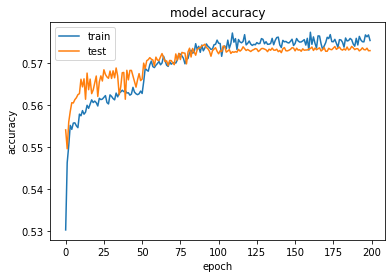

In [148]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

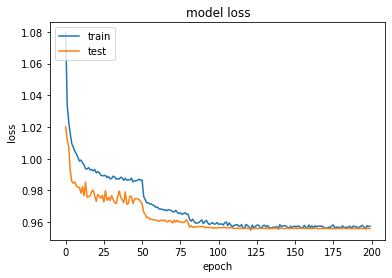

In [149]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
rfc=RandomForestClassifier(n_jobs=-1, random_state=42, oob_score = True)

In [31]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [32]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [33]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [34]:
rfc1=RandomForestClassifier(n_jobs=-1
                            , random_state=42
                            , max_features='auto'
                            , n_estimators= 500
                            , max_depth=8
                            , criterion='gini'
                            , oob_score=True)

In [36]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features='auto', n_estimators=500,
                       n_jobs=-1, oob_score=True, random_state=42)

In [37]:
rcf_pred = rfc1.predict(X_test)

In [38]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,rcf_pred))

Accuracy for Random Forest on CV data:  0.2739651416122004
